#Exercise




Estimate the location from WIFI Signal Strength




The dataset has 2,000 rows and 8 columns. The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.




You can use ANN analysis for this exerise to improve the ANN performance.

In [25]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [26]:
import pandas as pd

path = '/drive/MyDrive/Colab Notebooks/Deep Learning/wifi.csv'
df = pd.read_csv(path)

df

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [27]:
df.shape

(2000, 8)

In [28]:
df.head().T

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87
Room,1,1,1,1,1


In [29]:
room_dummies = pd.get_dummies(df['Room'])
room_dummies

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [30]:
X = df.drop('Room', axis =1 )
Y = room_dummies

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("Y_train", Y_train.shape)
print("Y_test", Y_test.shape)

X_train (1600, 7)
X_test (400, 7)
Y_train (1600, 4)
Y_test (400, 4)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
L1 = 100
L2 = 100

#input
model = Sequential()
model.add(Dense(L1, input_dim=7, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(L2, activation='relu'))

#output
model.add(Dense(4, activation='sigmoid'))

In [35]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [36]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data=(X_test, Y_test))

Epoch 1/10
16/16 [==============================] - 1s 19ms/step - loss: 0.7252 - accuracy: 0.7750 - val_loss: 0.3969 - val_accuracy: 0.9025
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.9388 - val_loss: 0.2422 - val_accuracy: 0.9300
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1667 - accuracy: 0.9531 - val_loss: 0.1862 - val_accuracy: 0.9500
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1297 - accuracy: 0.9594 - val_loss: 0.1583 - val_accuracy: 0.9525
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1101 - accuracy: 0.9638 - val_loss: 0.1357 - val_accuracy: 0.9600
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0984 - accuracy: 0.9656 - val_loss: 0.1222 - val_accuracy: 0.9675
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0893 - accuracy: 0.9737 - val_loss: 0.1089 - val_accuracy: 0.9725
Epoch 8/10
16/16 [=

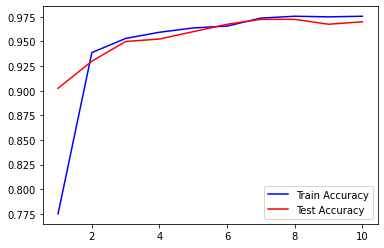

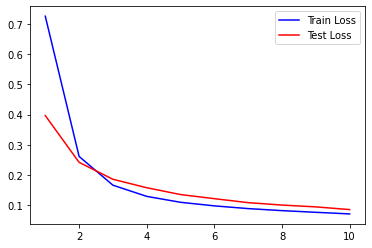

In [37]:
import matplotlib.pyplot as plt


acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')

plt.plot(epochs, val_acc,'r',label='Test Accuracy')

plt.legend()

plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')

plt.plot(epochs, val_loss,'r',label='Test Loss')

plt.legend()

plt.show()